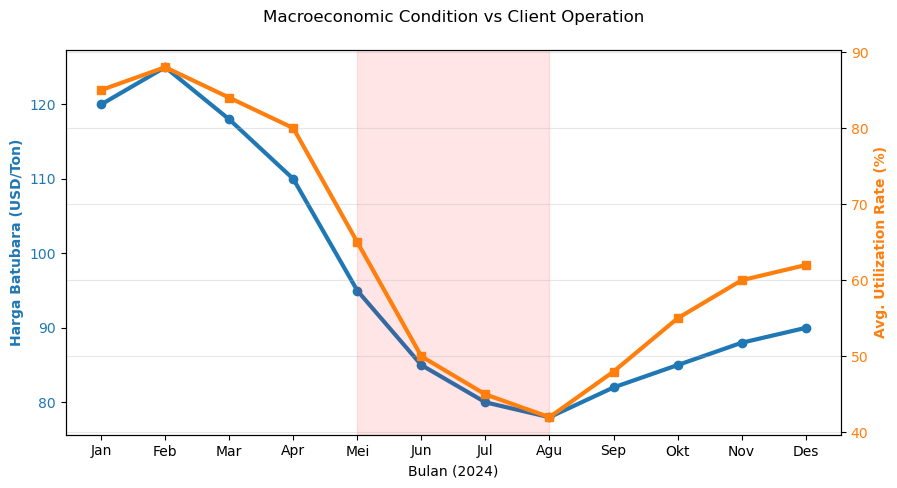

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Simulasi data 12 bulan
months = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
commodity_price = [120, 125, 118, 110, 95, 85, 80, 78, 82, 85, 88, 90] # Harga Batubara
utilization = [85, 88, 84, 80, 65, 50, 45, 42, 48, 55, 60, 62] # % Jam Kerja Alat

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Harga Komoditas (Kiri)
ax1.set_xlabel('Bulan (2024)')
ax1.set_ylabel('Harga Batubara (USD/Ton)', color='tab:blue', fontweight='bold')
ax1.plot(months, commodity_price, color='tab:blue', marker='o', linewidth=3, label='Coal Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Membuat sumbu Y kedua (Kanan)
ax2 = ax1.twinx()
ax2.set_ylabel('Avg. Utilization Rate (%)', color='tab:orange', fontweight='bold')
ax2.plot(months, utilization, color='tab:orange', marker='s', linewidth=3, label='Utilization Rate')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Menandai "Zona Risiko"
plt.axvspan('Mei', 'Agu', color='red', alpha=0.1, label='High Risk Period')

plt.title('Macroeconomic Condition vs Client Operation', pad=20)
plt.grid(True, alpha=0.3)
plt.show()

# 1. Create all combinations of 1000 Client IDs and Months In Mining
n_clients = 1000
data = {
    'Client_ID': range(1, n_clients + 1),
    'Utilization_Rate': np.random.uniform(20, 95, n_clients), # % jam kerja mesin
    'Coal_Price_Index': np.random.uniform(150, n_clients), # Harga pasar saat ini
    'Maintenance_Score': np.random.uniform(0, 100, n_clients) # Kondisi fisik alat
}


Koefisien Korelasi: -0.01


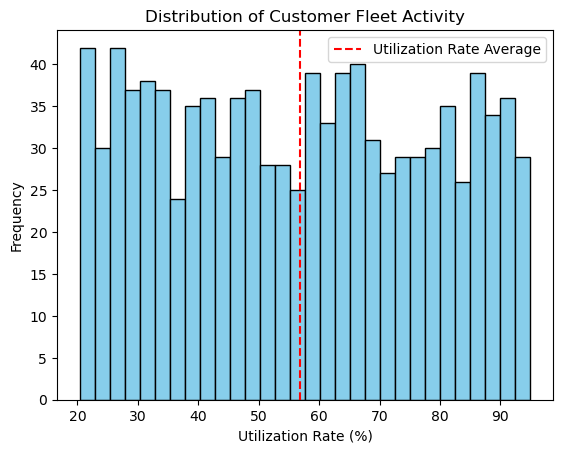

In [50]:
# Menghitung korelasi antara Harga Nikel dan Hari Keterlambatan (Arrears)
correlation = df['Coal_Price_Index'].corr(df['Days_Overdue'])

print(f"Koefisien Korelasi: {correlation:.2f}")


# Visualisasi Sampling Distribution dari Mean Utilization
plt.hist(df['Utilization_Rate'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.mean(df['Utilization_Rate']), color='red', linestyle='--', label='Utilization Rate Average')
plt.xlabel('Utilization Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Fleet Activity')
plt.legend()
plt.show()

In [51]:
sample_size = 10
sample_means = []
for i in range(200):
  samp = np.random.choice(df['Utilization_Rate'], sample_size, replace = False)
  # calculate mean here
  each_sample_mean = np.mean(samp)
  # append here
  sample_means.append(each_sample_mean)

print(sample_means)
clean_list = [int(x) for x in sample_means]
print(clean_list)
print(len(clean_lists))


[np.float64(56.957039517279114), np.float64(68.64942966243653), np.float64(52.485436157328955), np.float64(61.83445457029611), np.float64(50.0946015942031), np.float64(44.43839503105808), np.float64(49.42311513093587), np.float64(55.72788882057316), np.float64(59.287063896569386), np.float64(56.17526508086782), np.float64(57.9553260299967), np.float64(50.13801686609446), np.float64(61.29204020445475), np.float64(53.074056278837176), np.float64(60.963288678220195), np.float64(55.469907616901516), np.float64(60.76127027559571), np.float64(72.93096011949014), np.float64(52.18654640121721), np.float64(48.16481710247085), np.float64(55.917536475609424), np.float64(45.27555460922242), np.float64(48.857779337115986), np.float64(46.386219756287225), np.float64(47.39815932359882), np.float64(50.94417485706782), np.float64(49.150387363916465), np.float64(52.32135321172357), np.float64(60.0794522691872), np.float64(54.2998958342135), np.float64(47.379542653348416), np.float64(58.42685717689322), 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


# 1. Create all combinations of 1000 Client IDs and Months In Mining
n_clients = 1000
data = {
    'Client_ID': range(1, n_clients + 1),
    'Utilization_Rate': np.random.uniform(20, 95, n_clients), # % jam kerja mesin
    'Coal_Price_Index': np.random.uniform(150, n_clients), # Harga pasar saat ini
    'Maintenance_Score': np.random.uniform(0, 100, n_clients) # Kondisi fisik alat
}

# 2. Logika Risk Scoring (Quantitative)
# Risiko Tinggi jika Utilisasi < 50% DAN Harga Komoditas < 80
df['Risk_Score'] = (
    (100 - df['Utilization_Rate']) * 0.8 + 
    (150 - df['Coal_Price_Index']) * 0.2
)

# Menentukan Threshold Default (Contoh: Risk Score > 65 dianggap High Risk)
df['Status'] = df['Risk_Score'].apply(lambda x: 'High Risk' if x > 65 else 'Safe')

# 3. Menghitung Frekuensi menggunakan Count
print(df['Status'].value_counts())
print(df['Client_ID'],df['Risk_Score'])




Status
Safe         863
High Risk    137
Name: count, dtype: int64
0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: Client_ID, Length: 1000, dtype: int64 0      56.195200
1      15.202925
2      22.367338
3      32.900443
4      58.120781
         ...    
995    64.679883
996     9.742122
997    72.549638
998    23.958774
999    50.160286
Name: Risk_Score, Length: 1000, dtype: float64


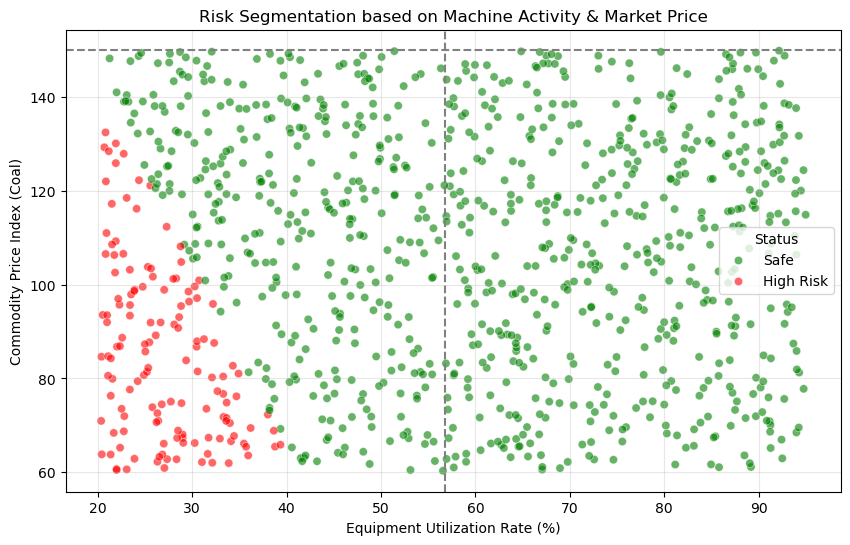

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Utilization_Rate', y='Coal_Price_Index', hue='Status', palette={'Safe': 'green', 'High Risk': 'red'}, alpha=0.6)

# Menambahkan garis threshold
plt.axvline(x=np.mean(df['Utilization_Rate']), color='gray', linestyle='--')
plt.axhline(y=150, color='gray', linestyle='--')

plt.title('Risk Segmentation based on Machine Activity & Market Price')
plt.xlabel('Equipment Utilization Rate (%)')
plt.ylabel('Commodity Price Index (Coal)')
plt.grid(True, alpha=0.3)
plt.show()

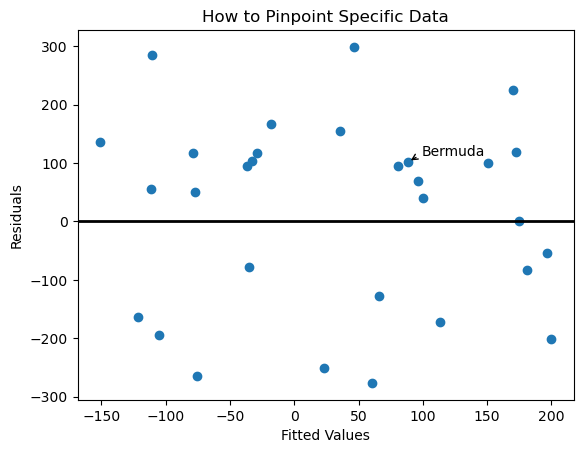

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
x = np.random.rand(30) * 400 - 200 # Mimics the range in your image
y = np.random.rand(30) * 600 - 300
labels = ['Point ' + str(i) for i in range(30)]
labels[0] = 'Bermuda' # Labeling a specific point for example

# Create the plot
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.axhline(0, color='black', lw=2) # Add a horizontal line at y=0

# Annotate a specific point (e.g., the first one, 'Bermuda')
# You need to manually find the index of the point you want to label
point_index = 0 
ax.annotate(labels[point_index], 
            xy=(x[point_index], y[point_index]), # The point being annotated
            xytext=(x[point_index] + 10, y[point_index] + 10), # Where the text goes
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle="arc3,rad=0.2")) # Optional arrow

plt.title('How to Pinpoint Specific Data')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
